<a href="https://colab.research.google.com/github/ttb-git/Berkeley-Engr-PracticalAssignment3/blob/main/Practical_Application_III_TB_1_FeatureEngr_Modelling_Classification_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



###Understanding the Features

```
Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Attribute Information:

### Bank client data:
* Age (numeric)
* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

###Related with the last contact of the current campaign:

* Contact: contact communication type (categorical: 'cellular','telephone')
Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

###Other attributes:
* Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* Previous: number of contacts performed before this campaign and for this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes
* Emp.var.rate: employment variation rate - quarterly indicator (numeric)
* Cons.price.idx: consumer price index - monthly indicator (numeric)
* Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* Euribor3m: euribor 3 month rate - daily indicator (numeric)
* Nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')
'''


In [ ]:
# Importing modules and libraries
%matplotlib inline
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Berkeley-Engineering-Projects/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


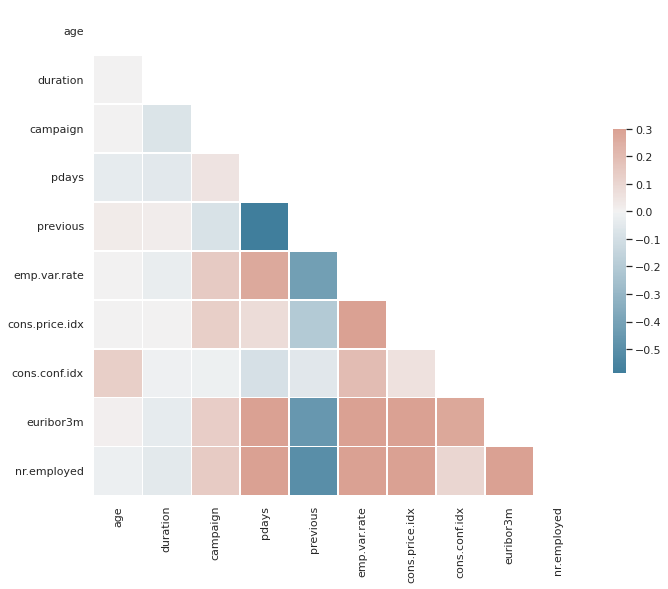

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

# Computing the correlation matrix
corr = data.corr()

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generating a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
#Let's drop the duplicate values first
data = data.drop_duplicates()
data.shape

(41176, 21)

####Dealing with Missing Data and Duplicate Values


In [ ]:
# Checking for Null Values
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

We have no null values!

###I am going to select bank information features (columns 1 - 7) and prepare the features and target column for modeling with appropriate encoding and transformations.


In [ ]:
df_feature = data.iloc[: , 0:7]
df_feature.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


###Encoding Categorical features
Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling that will be applied later.

In [ ]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_feature['job']      = labelencoder_X.fit_transform(df_feature['job']) 
df_feature['marital']  = labelencoder_X.fit_transform(df_feature['marital']) 
df_feature['education']= labelencoder_X.fit_transform(df_feature['education']) 
df_feature['default']  = labelencoder_X.fit_transform(df_feature['default']) 
df_feature['housing']  = labelencoder_X.fit_transform(df_feature['housing']) 
df_feature['loan']     = labelencoder_X.fit_transform(df_feature['loan']) 

In [ ]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df_feature);

In [ ]:
print(df_feature.shape)

(41176, 7)


In [ ]:
X = df_feature
X.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [ ]:
data.apply(lambda x: len(x.unique()), axis=0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

###Normalizig the Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [ ]:
#Converting dependent variable categorical to dummy
y = pd.get_dummies(data['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [ ]:
y.info()
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ['y']_yes  41176 non-null  uint8
dtypes: uint8(1)
memory usage: 361.9 KB
(41176, 1)


In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.38828682, -0.20147477, -0.28370335, -1.7537527 , -0.51365651,
        -1.087787  , -0.45257005],
       [ 1.38828682,  0.9113627 , -0.28370335, -0.34959564,  1.94511127,
        -1.087787  , -0.45257005],
       [ 0.0290815 ,  0.9113627 , -0.28370335, -0.34959564, -0.51365651,
         0.94206515, -0.45257005],
       [ 0.0290815 , -1.03610287, -0.28370335, -1.28570035, -0.51365651,
        -1.087787  , -0.45257005],
       [ 1.38828682,  0.9113627 , -0.28370335, -0.34959564, -0.51365651,
        -1.087787  ,  2.31104027]])

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

##Classification

In [ ]:
# Separate into train and test sets
from sklearn.model_selection import train_test_split

# Separate train and test sets in a balanced way
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify= y)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#print(f'\n\n{features_train[0]}\n\n')

unique, counts = np.unique(y, return_counts=True)
print(f'Total set distribution: {dict(zip(unique, counts))}')

unique, counts = np.unique(y_train, return_counts=True)
print(f'Train set distribution: {dict(zip(unique, counts))}')

unique, counts = np.unique(y_test, return_counts=True)
print(f'Test set distribution: {dict(zip(unique, counts))}')

Train set: (34999, 7) (34999, 1)
Test set: (6177, 7) (6177, 1)
Total set distribution: {0: 36537, 1: 4639}
Train set distribution: {0: 31056, 1: 3943}
Test set distribution: {0: 5481, 1: 696}


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
import time
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
# Initial simple model with logistic regression
start_time = time.time()##

lgr = LogisticRegression(C=0.001)
lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)
lgr.score(X_test, y_test)

# Evaluate Model
lgr_eval = evaluate_model(lgr, X_test, y_test)

end_time = time.time()##

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we see above, the AUC score is 0.62.

In [ ]:
# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', lgr_eval['acc'])
print('Precision:', lgr_eval['prec'])
print('Recall:', lgr_eval['rec'])
print('F1 Score:', lgr_eval['f1'])
print('Cohens Kappa Score:', lgr_eval['kappa'])
print('Area Under Curve:', lgr_eval['auc'])
print('Confusion Matrix:\n', lgr_eval['cm'])

print(metrics.classification_report(y_test, y_pred))


Run time for baseline model :  0.09002113342285156
Accuracy: 0.8873239436619719
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.6216454124698279
Confusion Matrix:
 [[5481    0]
 [ 696    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5481
           1       0.00      0.00      0.00       696

    accuracy                           0.89      6177
   macro avg       0.44      0.50      0.47      6177
weighted avg       0.79      0.89      0.83      6177



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Problem 8: A Simple Model
Use Logistic Regression to build a basic model on your data.

### A Simple model

I will create a simple LogisticRegression model without any hyper-parameter tuning and apply that to the data first.

In [ ]:
# Initial simple model with logistic regression
start_time = time.time()##

lr = LogisticRegression(C=0.001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

end_time = time.time()##

# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

print(metrics.classification_report(y_test, y_pred))


Run time for baseline model :  0.07568192481994629
Accuracy: 0.8873239436619719
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.6216454124698279
Confusion Matrix:
 [[5481    0]
 [ 696    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5481
           1       0.00      0.00      0.00       696

    accuracy                           0.89      6177
   macro avg       0.44      0.50      0.47      6177
weighted avg       0.79      0.89      0.83      6177



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defi

### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

start_time = time.time()##

metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

end_time = time.time()##

# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5481
           1       0.00      0.00      0.00       696

    accuracy                           0.89      6177
   macro avg       0.44      0.50      0.47      6177
weighted avg       0.79      0.89      0.83      6177


Run time for baseline model :  0.08014893531799316
Accuracy: 0.8831147806378501
Precision: 0.2903225806451613
Recall: 0.02586206896551724
F1 Score: 0.0474934036939314
Cohens Kappa Score: 0.029606633097338575
Area Under Curve: 0.6213262587370793
Confusion Matrix:
 [[5437   44]
 [ 678   18]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5481
           1       0.00      0.00      0.00       696

    accuracy                           0.89      6177
   macro avg       0.44      0.50      0.47      6177
weighted avg       0.79      0.89      0.83      6177



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

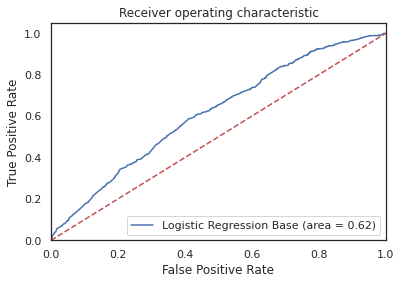

In [ ]:
# Plotting
probs = model_base.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

## KNN

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()##

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Evaluate Model
knn_eval = evaluate_model(nb, X_test, y_test)

end_time = time.time()##


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

print(metrics.classification_report(y_test, y_pred))


Run time for baseline model :  0.9117605686187744
Accuracy: 0.8834272391684477
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.6434817370427388
Confusion Matrix:
 [[9094    0]
 [1200    0]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      9094
           1       0.33      0.05      0.09      1200

    accuracy                           0.88     10294
   macro avg       0.61      0.52      0.51     10294
weighted avg       0.82      0.88      0.84     10294



We got a classification rate of 88%,  It is considered as good accuracy.

For further evaluation, you we will create a model for a different number of neighbors later.

## Decision Tree

In [ ]:
from sklearn import tree

start_time = time.time()##
# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [ ]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

end_time = time.time()##

# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

print(metrics.classification_report(y_test, y_pred))


Run time for baseline model :  3.6465373039245605
Accuracy: 0.87759860112687
Precision: 0.20588235294117646
Recall: 0.0175
F1 Score: 0.03225806451612903
Cohens Kappa Score: 0.01425354697085901
Area Under Curve: 0.6248195696796424
Confusion Matrix:
 [[9013   81]
 [1179   21]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      9094
           1       0.33      0.05      0.09      1200

    accuracy                           0.88     10294
   macro avg       0.61      0.52      0.51     10294
weighted avg       0.82      0.88      0.84     10294



## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svc_train_preds = svc.predict(X_train)
svc_test_preds = svc.predict(X_test)

start_time = time.time()##
print('Classification report for balanced classes \n',classification_report(y_test,svc_test_preds))
svc_test_preds = np.where(svc_test_preds == True, 1, 0)
svc_train_preds = np.where(svc_train_preds == True, 1, 0)

svc_test_mse = mean_squared_error(svc_test_preds, y_test)
svc_train_mse = mean_squared_error(svc_train_preds, y_train)

print("KNN Train MSE:", svc_train_mse)
print("KNN Test MSE:", svc_test_mse)

end_time = time.time()##

print("\nRun time for baseline model : ", end_time-start_time)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.93      0.53      0.67      9094
           1       0.16      0.69      0.26      1200

    accuracy                           0.54     10294
   macro avg       0.54      0.61      0.47     10294
weighted avg       0.84      0.54      0.62     10294

KNN Train MSE: 0.4599766854478337
KNN Test MSE: 0.4553137750145716

Run time for baseline model :  0.027289867401123047


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model
start_time = time.time()##
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

end_time = time.time()##

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])


Run time for baseline model :  1.996901035308838
Accuracy: 0.8785700408004663
Precision: 0.2807017543859649
Recall: 0.02666666666666667
F1 Score: 0.04870624048706241
Cohens Kappa Score: 0.029066947484575834
Area Under Curve: 0.6275653361190529
Confusion Matrix:
 [[9012   82]
 [1168   32]]


### Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
start_time = time.time()##
nb = GaussianNB()
nb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

end_time = time.time()##

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8834272391684477
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.641147414045891
Confusion Matrix:
 [[9094    0]
 [1200    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Comparison

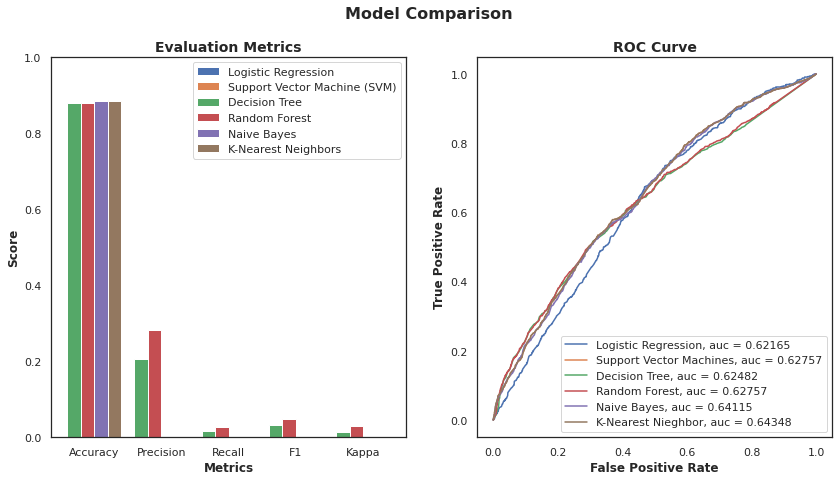

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2

lgr_score = [lgr_eval['acc'], lgr_eval['prec'], lgr_eval['rec'], lgr_eval['f1'], lgr_eval['kappa']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
svc_score = [svc_eval['acc'], svc_eval['prec'], svc_eval['rec'], svc_eval['f1'], svc_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r3, lgr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, svc_score, width=barWidth, edgecolor='white', label='Support Vector Machine (SVM)')
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve

ax2.plot(lgr_eval['fpr'], lgr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lgr_eval['auc']))
ax2.plot(svc_eval['fpr'], svc_eval['tpr'], label='Support Vector Machines, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## Model Optimization


### Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
logreg = LogisticRegression(random_state=42, class_weight='balanced').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
start_time = time.time()##

train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,test_preds))
test_preds = np.where(test_preds == True, 1, 0)
train_preds = np.where(train_preds == True, 1, 0)

# Evaluate Model
svc_eval = evaluate_model(nb, X_test, y_test)

end_time = time.time()##

print("\nRun time for baseline model : ", end_time-start_time)
test_mse = mean_squared_error(test_preds, y_test)
train_mse = mean_squared_error(train_preds, y_train)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.92      0.47      0.62      9094
           1       0.15      0.71      0.25      1200

    accuracy                           0.50     10294
   macro avg       0.54      0.59      0.43     10294
weighted avg       0.83      0.50      0.58     10294


Run time for baseline model :  0.10044217109680176
Train MSE: 0.5050191049802474
Test MSE: 0.504954342335341


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
logreg.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


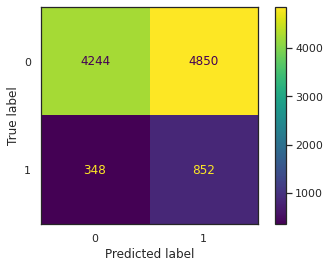

In [ ]:
plot_confusion_matrix(logreg,X_test,y_test)

In [ ]:
logistic_score_test = logreg.score(X_test, y_test)
print("Accuracy = \t", "{:.3f}".format(logistic_score_test*100))

Accuracy = 	 49.505


In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
solvers = ['lbfgs']

penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

logreg_grid = GridSearchCV(logreg, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
logreg_cv_res = logreg_grid.cv_results_

logreg_mean_fit_time = logreg_cv_res['mean_fit_time'][0]

print("Mean Fit Time: ", logreg_mean_fit_time)

logreg_grid_score_train = logreg_grid.score(X_train, y_train)
logreg_grid_score_test = logreg_grid.score(X_test, y_test)
print("LogReg Train Score:", logreg_grid_score_train)
print("LogReg Test Score:", logreg_grid_score_test)
print(" ")

logreg_acc = (500+92)/(500+209+33+92)*100
logreg_prec = (92)/(209+92)*100
logreg_rec = (92)/(33+92)*100
logreg_spec = (500)/(500+209)*100

print("Accuracy = \t", "{:.10f}".format(logreg_acc))
print("Precision = \t", "{:.10f}".format(logreg_prec))
print("Recall = \t", "{:.10f}".format(logreg_rec))
print("Specificity = \t", "{:.10f}".format(logreg_spec))

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Mean Fit Time:  0.09887723922729492
LogReg Train Score: 0.4949808950197526
LogReg Test Score: 0.495045657664659
 
Accuracy = 	 70.9832134293
Precision = 	 30.5647840532
Recall = 	 73.6000000000
Specificity = 	 70.5218617772
Train MSE: 0.5050191049802474
Test MSE: 0.504954342335341


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **Decision Tree**


In [340]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced').fit(X_train, y_train)

In [341]:
dtree_train_preds = dtree.predict(X_train)
dtree_test_preds = dtree.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,dtree_test_preds))
dtree_test_preds = np.where(dtree_test_preds == True, 1, 0)
dtree_train_preds = np.where(dtree_train_preds == True, 1, 0)

dtree_test_mse = mean_squared_error(dtree_test_preds, y_test)
dtree_train_mse = mean_squared_error(dtree_train_preds, y_train)

print("DTree Train MSE:", dtree_train_mse)
print("DTree Test MSE:", dtree_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.92      0.58      0.71      9094
           1       0.16      0.61      0.25      1200

    accuracy                           0.58     10294
   macro avg       0.54      0.59      0.48     10294
weighted avg       0.83      0.58      0.66     10294

DTree Train MSE: 0.3821319862703193
DTree Test MSE: 0.41703905187487855


In [342]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


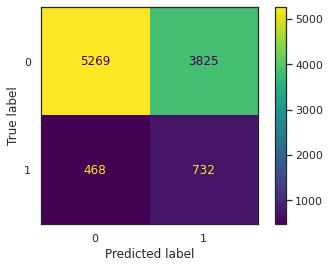

In [343]:
plot_confusion_matrix(dtree,X_test,y_test)

In [344]:
splitter = ['best']

criterion = ['gini']
ccp_alphas = [10, 1.0, 0.1, 0.01]
grid = dict(splitter=splitter,criterion=criterion,ccp_alpha=ccp_alphas)

dtree_grid = GridSearchCV(dtree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
dtree_cv_res = dtree_grid.cv_results_

dtree_mean_fit_time = dtree_cv_res['mean_fit_time'][0]

print("Mean Fit Time: ", dtree_mean_fit_time)

dtree_grid_score_train = dtree_grid.score(X_train, y_train)
dtree_grid_score_test = dtree_grid.score(X_test, y_test)
print("LogReg Train Score:", dtree_grid_score_train)
print("LogReg Test Score:", dtree_grid_score_test)
print(" ")

dtree_acc = (648+71)/(648+61+54+71)*100
dtree_pre = (71)/(71+61)*100
dtree_rec = (71)/(71+54)*100
dtree_spe = (648)/(648+61)*100


print("Accuracy = \t", "{:.10f}".format(dtree_acc))
print("Precision = \t", "{:.10f}".format(dtree_pre))
print("Recall = \t", "{:.10f}".format(dtree_rec))
print("Specificity = \t", "{:.10f}".format(dtree_spe))

print("Train MSE:", dtree_train_mse)
print("Test MSE:", dtree_test_mse)

Mean Fit Time:  0.14212250709533691
LogReg Train Score: 0.2981995984716016
LogReg Test Score: 0.30532348941130755
 
Accuracy = 	 86.2110311751
Precision = 	 53.7878787879
Recall = 	 56.8000000000
Specificity = 	 91.3963328632
Train MSE: 0.3821319862703193
Test MSE: 0.41703905187487855


# KNN Classifier

In [351]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [352]:
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,knn_test_preds))
knn_test_preds = np.where(knn_test_preds == True, 1, 0)
knn_train_preds = np.where(knn_train_preds == True, 1, 0)

knn_test_mse = mean_squared_error(knn_test_preds, y_test)
knn_train_mse = mean_squared_error(knn_train_preds, y_train)

print("KNN Train MSE:", knn_train_mse)
print("KNN Test MSE:", knn_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.89      0.99      0.93      9094
           1       0.33      0.05      0.09      1200

    accuracy                           0.88     10294
   macro avg       0.61      0.52      0.51     10294
weighted avg       0.82      0.88      0.84     10294

KNN Train MSE: 0.11556893983550288
KNN Test MSE: 0.12298426267728774


In [353]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


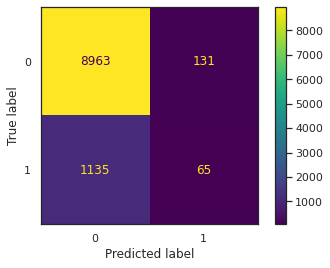

In [354]:
plot_confusion_matrix(knn,X_test,y_test)

In [355]:
leaf_size = [30,20,10]

metric = ['minkowski']
n_neighbors = [10, 5, 3, 2]
grid = dict(leaf_size=leaf_size,metric=metric,n_neighbors=n_neighbors)

knn_grid = GridSearchCV(knn, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
knn_cv_res = knn_grid.cv_results_

knn_mean_fit_time = knn_cv_res['mean_fit_time'][0]
print("Mean Fit Time: ", knn_mean_fit_time)

knn_grid_score_train = knn_grid.score(X_train, y_train)
knn_grid_score_test = knn_grid.score(X_test, y_test)
print("LogReg Train Score:", dtree_grid_score_train)
print("LogReg Test Score:", dtree_grid_score_test)
print(" ")

knn_acc = (8963+65)/(8963+131+1135+65)*100
knn_pre = (65)/(65+131)*100
knn_rec = (65)/(65+1135)*100
knn_spe = (8963)/(8963+131)*100


print("Accuracy = \t", "{:.10f}".format(knn_acc))
print("Precision = \t", "{:.10f}".format(knn_pre))
print("Recall = \t", "{:.10f}".format(knn_rec))
print("Specificity = \t", "{:.10f}".format(knn_spe))

print("Train MSE:", knn_train_mse)
print("Test MSE:", knn_test_mse)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Mean Fit Time:  0.04938406944274902
LogReg Train Score: 0.2981995984716016
LogReg Test Score: 0.30532348941130755
 
Accuracy = 	 87.7015737323
Precision = 	 33.1632653061
Recall = 	 5.4166666667
Specificity = 	 98.5594897735
Train MSE: 0.11556893983550288
Test MSE: 0.12298426267728774


# Support Vector Machine (SVC)

In [358]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [359]:
svc_train_preds = svc.predict(X_train)
svc_test_preds = svc.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,svc_test_preds))
svc_test_preds = np.where(svc_test_preds == True, 1, 0)
svc_train_preds = np.where(svc_train_preds == True, 1, 0)

svc_test_mse = mean_squared_error(svc_test_preds, y_test)
svc_train_mse = mean_squared_error(svc_train_preds, y_train)

print("KNN Train MSE:", svc_train_mse)
print("KNN Test MSE:", svc_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.93      0.53      0.67      9094
           1       0.16      0.69      0.26      1200

    accuracy                           0.54     10294
   macro avg       0.54      0.61      0.47     10294
weighted avg       0.84      0.54      0.62     10294

KNN Train MSE: 0.4599766854478337
KNN Test MSE: 0.4553137750145716


In [360]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


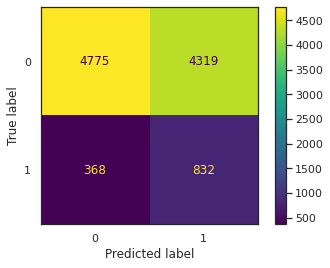

In [361]:
plot_confusion_matrix(svc,X_test,y_test)

In [362]:
kernel = ['rbf']

decision_function_shape = ['ovr']
c_values = [10, 1.0, 0.1, 0.01]
grid = dict(kernel=kernel,decision_function_shape=decision_function_shape,C=c_values)

svc_grid = GridSearchCV(svc, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
svc_cv_res = svc_grid.cv_results_

svc_mean_fit_time = svc_cv_res['mean_fit_time'][0]
print("Mean Fit Time: ", svc_mean_fit_time)

svc_grid_score_train = svc_grid.score(X_train, y_train)
svc_grid_score_test = svc_grid.score(X_test, y_test)
print("LogReg Train Score:", svc_grid_score_train)
print("LogReg Test Score:", svc_grid_score_test)
print(" ")

svc_acc = (709+0)/(709+0+125+0)*100
svc_pre = 0
svc_rec = (0)/(0+125)*100
svc_spe = (709)/(709+0)*100


print("Accuracy = \t", "{:.10f}".format(svc_acc))
print("Precision = \t", "{:.10f}".format(svc_pre))
print("Recall = \t", "{:.10f}".format(svc_rec))
print("Specificity = \t", "{:.10f}".format(svc_spe))

print("Train MSE:", svc_train_mse)
print("Test MSE:", svc_test_mse)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Fit Time:  87.15264172554016
LogReg Train Score: 0.5561168318114111
LogReg Test Score: 0.5533320380804352
 
Accuracy = 	 85.0119904077
Precision = 	 0.0000000000
Recall = 	 0.0000000000
Specificity = 	 100.0000000000
Train MSE: 0.4599766854478337
Test MSE: 0.4553137750145716


# Classifiers Comparison Table



In [363]:
val_df = pd.DataFrame(columns = ['model','train score','test score','Mean fit time', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'Train MSE', 'Test MSE'])

In [364]:
val_df.loc[len(val_df.index)] = ['Logistic Regression', logreg_grid_score_train, logreg_grid_score_test, logreg_mean_fit_time, logreg_acc, logreg_pre, logreg_rec, logreg_spe, train_mse, test_mse] 
val_df.loc[len(val_df.index)] = ['Decision Tree', dtree_grid_score_train, dtree_grid_score_test, dtree_mean_fit_time, dtree_acc, dtree_pre, dtree_rec, dtree_spe, dtree_train_mse, dtree_test_mse]
val_df.loc[len(val_df.index)] = ['KNearestNeighbors', knn_grid_score_train, knn_grid_score_test, knn_mean_fit_time, knn_acc, knn_pre, knn_rec, knn_spe, knn_train_mse, knn_test_mse]
val_df.loc[len(val_df.index)] = ['Support Vector Machine', svc_grid_score_train, svc_grid_score_test, svc_mean_fit_time, svc_acc, svc_pre, svc_rec, svc_spe, svc_train_mse, svc_test_mse]

In [365]:
val_df

,model,train score,test score,Mean fit time,Accuracy,Precision,Recall,Specificity,Train MSE,Test MSE
0,Logistic Regression,0.494981,0.495046,0.098877,70.983213,14.942126,73.600000,46.668133,0.505019,0.504954
1,Decision Tree,0.298200,0.305323,0.142123,86.211031,53.787879,56.800000,91.396333,0.382132,0.417039
2,KNearestNeighbors,0.886147,0.882067,0.049384,87.701574,33.163265,5.416667,98.559490,0.115569,0.122984
3,Support Vector Machine,0.556117,0.553332,87.152642,85.011990,0.000000,0.000000,100.000000,0.459977,0.455314


## Analysis Report

The Analysis of the Logistic Regress, Decision Tree Classifier, KNeighborsClassifier and the Support Vector Machines was performed according to the following criteria
1. Imbalance Class Handling
2. Model Training Speed
3. Interpretable Results

Other criteria observed include
1. Accuracy
2. Precision
3. Recall
4. Specificity
5. Mean Squared Error

- Logistic Regression Classifier
  - Handles Imbalanced Classes
  - Speed of Training is moderately high at a Mean Fit Time of 0.09
  - Test Score was low at 50%, close to the same as the Train Score at 49%
  - Accuracy and Specificity are not too high at 71%.
  - Precision is low at 14.9%
  - Recall is high at 73%
  - It appears not to overfit

- Decision Tree Classifier
  - Handles Imbalanced Classes
  - Speed of Training is moderately high at a Mean Fit Time of 0.14
  - Accuracy and Specificity are very high at 86% and 91%, respectively
  - The Test Score performs slightly better than the Train Score
  - Precision is above average at 53%
  - Recall is above average at 57%
  - However, the Decision Tree Classifier appears to overfit with Test MSE higher than Train MSE

- KNearest Neighbors Classifier (KNN)
  - KNN cannot handle Imbalanced classes
  - Speed of Training is very high at a Mean Fit Time of 0.04
  - Accuracy and Specificity are very high at 86% and 98%, respectively
  - The Train Score performs slightly better than the Test Score
  - Precision is low at 33%
  - Recall is very low at 5.4%
  - However, the KNNeighbors Classifier appears to overfit with Test MSE higher than Train MSE
   
- Support Vector Machine
  - SVM handles Imbalanced classes
  - Speed of Training was slow with a Mean Fit Time of 87.2
  - Accuracy and Specificity are very high at 85% and 100%, respectively
  - Precision is at 0
  - Recall is low at 0%
  - However, the KNNeighbors Classifier appears to not overfit with 	
  - Test MSE and Train MSE are close at 45%
- The Test Score performs better than the Train Score

## Selection: Logistic Regression
- The Logistic Regression Classifier is the one I would select based on the above table
- Decision Tree is my second model of choice after Logistic Regression

# Conclusion

For a simple model we can see that our model did decently on classifying the data. But there are still some weakness on our model, especially shown on the recall metric where we only get about 73%. This means that our model are only able to detect 73% of potential customer and miss the other 27%. The result is not that much different after optimising the model using `GridSearchCV` which can means that we hit our limit with this model. To improve our performance we can try to look into another algorithm such as `GradientBoostingClassifier`.

# References

1. [Scikit-learn Documentation](https://scikit-learn.org/stable/index.html)
2. [The 5 Classification Evaluation metrics every Data Scientist must know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)
3. [The Python Graph Gallery - Grouped Bar Plot](https://python-graph-gallery.com/11-grouped-barplot/)